## EDA by Echefu Louis

### Lets Import the necessery Liberaries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('e-finance dataset.csv')
df

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,Page count,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Molecular Sequence Numbers,Chemicals/CAS,Tradenames,Manufacturers,Funding Details,Funding Text 1,Funding Text 2,References,Correspondence Address,Editors,Sponsors,Publisher,Conference name,Conference date,Conference location,Conference code,ISSN,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",57189258279;8933999000;22834655700;55841871100...,Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,NaN,50,57.0,NaN,NaN,10.1145/3366626.3368132,https://www.scopus.com/inward/record.uri?eid=2...,"imec-DistriNet, KU Leuven, Belgium; imec-COSIC...","Beni, E.H., imec-DistriNet, KU Leuven, Belgium...",Business application owners want to outsource ...,Data protection; Middleware; Security and privacy,Cryptography; Data privacy; Economic and socia...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Agrawal, R., Kiernan, J., Srikant, R., Xu, Y.,...",NaN,NaN,ACM,"Association for Computing Machinery, Inc",20th International Middleware Conference Indus...,9 December 2019 through 13 December 2019,NaN,156761.0,NaN,9781450370417,NaN,NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Open Access,Scopus,2-s2.0-85078939286
1,"Xiong H., Zhou Y.",57212174318;57212168803;,Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,NaN,29,34.0,NaN,NaN,10.2112/SI97-005.1,https://www.scopus.com/inward/record.uri?eid=2...,"School of Management, Nanchang University, Nan...","Xiong, H., School of Management, Nanchang Univ...",The existing enterprise performance evaluation...,analytic hierarchy process; Environmental valu...,analytical hierarchy process; industrial enter...,NaN,NaN,NaN,NaN,NaN,*Corresponding author: 312809615@qq.com ©Coast...,NaN,"Boczon, A., Dudzinska, M., Kowalska, A., Effec...","Xiong, H.; School of Management, Nanchang Univ...",NaN,NaN,Coastal Education Research Foundation Inc.,NaN,NaN,NaN,NaN,07490208,NaN,JCRSE,NaN,English,J. Coast. Res.,Article,Final,NaN,Scopus,2-s2.0-85076117139
2,"Feng L., Zhang H., Tsai W.-T., Sun S.",57194783804;56979549200;57050382000;57197771738;,System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,NaN,1151,1165.0,NaN,2.0,10.1007/s11704-018-6345-4,https://www.scopus.com/inward/record.uri?eid=2...,State Key Laboratory of Software Development E...,"Feng, L., State Key Laboratory of Software Dev...","Blockchain(BC), as an emerging distributed dat...",blockchain; concurrency; consensus algorithm; ...,Blockchain; Boron carbide; Commerce; Internet ...,NaN,NaN,NaN,NaN,National Basic Research Program of China (973 ...,This work is supported by National Key Researc...,NaN,"Garay, J., Kiayias, A., Leonardos, N., The bit...","Zhang, H.; State Key Laboratory of Software De...",NaN,NaN,Higher Education Press,NaN,NaN,NaN,NaN,20952228,NaN,NaN,NaN,English,Front. Comput. Sci.,Article,Final,NaN,Scopus,2-s2.0-85051801026
3,"Rožkalne Z., Mukāns M., Vētra A.",57211844555;56074676500;6506045608;,Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,737,NaN,NaN,NaN,NaN,10.3390/medicina55110737,https://www.scopus.com/inward/record.uri?eid=2...,"Rehabilitation Clinic, Children’s Clinical Uni...","Rožkalne, Z., Rehabilitation Clinic, Children’...",Background and Objectives: The aim of this stu...,Cerebral palsy; Developmental transition; Disa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Mutch, L., Alberman, E., Hagberg, B., Kodama, ...","Rožkalne, Z.; Rehabilitation Clinic, Children’...",NaN,NaN,MDPI AG,NaN,NaN,NaN,NaN,1010660X,NaN,NaN,31739609.0,English,Medicina,Article,Final,Open Access,Scopus,2-s2.0-85075115419
4,"Alshubiri F., Jamil S.A., Elheddad M.",565

In [3]:
df.shape

(228, 46)

In [4]:
df.describe()

,Year,Page end,Page count,Cited by,Molecular Sequence Numbers,Chemicals/CAS,Tradenames,Manufacturers,Conference code,PubMed ID
count,228.000000,199.000000,4.000000,153.000000,0.0,0.0,0.0,0.0,62.000000,4.000000e+00
mean,2010.214912,723.462312,69.750000,9.294118,NaN,NaN,NaN,NaN,99295.548387,2.013451e+07
std,6.172437,5156.031031,115.508658,14.032801,NaN,NaN,NaN,NaN,33891.037731,9.310620e+06
min,1981.000000,3.000000,10.000000,1.000000,NaN,NaN,NaN,NaN,6372.000000,1.030222e+07
25%,2007.000000,100.500000,12.250000,2.000000,NaN,NaN,NaN,NaN,84516.750000,1.424886e+07
50%,2011.000000,206.000000,13.000000,4.000000,NaN,NaN,NaN,NaN,92701.500000,1.924810e+07
75%,2014.000000,416.000000,70.500000,10.000000,NaN,NaN,NaN,NaN,109673.250000,2.513375e+07
max,2019.000000,72560.000000,243.000000,86.000000,NaN,NaN,NaN,NaN,227949.000000,3.173961e+07


#### From the count row, we can see that the toal number of observation is 228, and the year range is from 1981 to 2019.

In [5]:
#The Percentage of missing values in the dataset

df.isnull().sum()/df.shape[0]*100

Authors                            0.000000
Author(s) ID                       0.000000
Title                              0.000000
Year                               0.000000
Source title                       0.438596
Volume                            21.052632
Issue                             35.526316
Art. No.                          88.157895
Page start                         9.649123
Page end                          12.719298
Page count                        98.245614
Cited by                          32.894737
DOI                               23.684211
Link                               0.000000
Affiliations                       6.140351
Authors with affiliations          0.877193
Abstract                           0.000000
Author Keywords                   21.052632
Index Keywords                    55.701754
Molecular Sequence Numbers       100.000000
Chemicals/CAS                    100.000000
Tradenames                       100.000000
Manufacturers                   

#### We will have to drop the columns with null values above 60%.  

In [6]:
df= df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [7]:
#Check the dataset again

df.isnull().sum()

Authors                           0
Author(s) ID                      0
Title                             0
Year                              0
Source title                      1
Volume                           48
Issue                            81
Page start                       22
Page end                         29
Cited by                         75
DOI                              54
Link                              0
Affiliations                     14
Authors with affiliations         2
Abstract                          0
Author Keywords                  48
References                       16
Correspondence Address           37
Publisher                        88
ISSN                             54
Language of Original Document     0
Abbreviated Source Title         10
Document Type                     0
Publication Stage                 0
Source                            0
EID                               0
dtype: int64

#### From the above count values, we have dropped Columns with empty entries above 60%

In [8]:
df

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Page start,Page end,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,References,Correspondence Address,Publisher,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Source,EID
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",57189258279;8933999000;22834655700;55841871100...,Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,50,57.0,NaN,10.1145/3366626.3368132,https://www.scopus.com/inward/record.uri?eid=2...,"imec-DistriNet, KU Leuven, Belgium; imec-COSIC...","Beni, E.H., imec-DistriNet, KU Leuven, Belgium...",Business application owners want to outsource ...,Data protection; Middleware; Security and privacy,"Agrawal, R., Kiernan, J., Srikant, R., Xu, Y.,...",NaN,"Association for Computing Machinery, Inc",NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Scopus,2-s2.0-85078939286
1,"Xiong H., Zhou Y.",57212174318;57212168803;,Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,29,34.0,NaN,10.2112/SI97-005.1,https://www.scopus.com/inward/record.uri?eid=2...,"School of Management, Nanchang University, Nan...","Xiong, H., School of Management, Nanchang Univ...",The existing enterprise performance evaluation...,analytic hierarchy process; Environmental valu...,"Boczon, A., Dudzinska, M., Kowalska, A., Effec...","Xiong, H.; School of Management, Nanchang Univ...",Coastal Education Research Foundation Inc.,07490208,English,J. Coast. Res.,Article,Final,Scopus,2-s2.0-85076117139
2,"Feng L., Zhang H., Tsai W.-T., Sun S.",57194783804;56979549200;57050382000;57197771738;,System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,1151,1165.0,2.0,10.1007/s11704-018-6345-4,https://www.scopus.com/inward/record.uri?eid=2...,State Key Laboratory of Software Development E...,"Feng, L., State Key Laboratory of Software Dev...","Blockchain(BC), as an emerging distributed dat...",blockchain; concurrency; consensus algorithm; ...,"Garay, J., Kiayias, A., Leonardos, N., The bit...","Zhang, H.; State Key Laboratory of Software De...",Higher Education Press,20952228,English,Front. Comput. Sci.,Article,Final,Scopus,2-s2.0-85051801026
3,"Rožkalne Z., Mukāns M., Vētra A.",57211844555;56074676500;6506045608;,Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,NaN,NaN,NaN,10.3390/medicina55110737,https://www.scopus.com/inward/record.uri?eid=2...,"Rehabilitation Clinic, Children’s Clinical Uni...","Rožkalne, Z., Rehabilitation Clinic, Children’...",Background and Objectives: The aim of this stu...,Cerebral palsy; Developmental transition; Disa...,"Mutch, L., Alberman, E., Hagberg, B., Kodama, ...","Rožkalne, Z.; Rehabilitation Clinic, Children’...",MDPI AG,1010660X,English,Medicina,Article,Final,Scopus,2-s2.0-85075115419
4,"Alshubiri F., Jamil S.A., Elheddad M.",56539905200;56770916900;57195032630;,The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,10.1177/1847979019870670,https://www.scopus.com/inward/record.uri?eid=2...,"Department of Finance and Economics, College o...","Alshubiri, F., Department of Finance and Econo...",The globalization revolution has led to many c...,E-finance; economic growth; financial developm...,"Sassi, S., Goaied, M., Financial development, ...","Alshubiri, F.; Department of Finance and Econo...",SAGE Publications Inc.,18479790,English,Intern. J. Eng. Bus. Manage.,Article,Final,Scopus,2-s2.0-85071721834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,"Wood S.D., Trenter S.W., Brown S.W.",7401448337;6507120033;7501416829;,A strategic marketing approach to reduce healt...,1988,Medical Group Management,35,2,14+16,18.0,1.0,NaN,https://www.scopus.com/inward/record.uri?eid=2

In [9]:
df['Language of Original Document'].unique()

array(['English', 'Polish', 'Chinese', 'German'], dtype=object)

In [10]:
language_count=df.groupby('Language of Original Document')['Language of Original Document'].count()
language_count

Language of Original Document
Chinese      2
English    223
German       2
Polish       1
Name: Language of Original Document, dtype: int64

#### From the above array, we can see that the Jornals are from four languages. English,Polish,Chinese,German. The most is English

In [11]:
years= [year for year, df in df.groupby('Year')]
years

[1981,
 1984,
 1986,
 1988,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [12]:
year_count=df.groupby('Year')['Year'].count()
year_count

Year
1981     2
1984     1
1986     1
1988     1
2001     5
2002     8
2003     4
2004     7
2005    10
2006    15
2007    13
2008     9
2009     4
2010    19
2011    35
2012    19
2013    13
2014     9
2015    11
2016     7
2017    11
2018     9
2019    15
Name: Year, dtype: int64

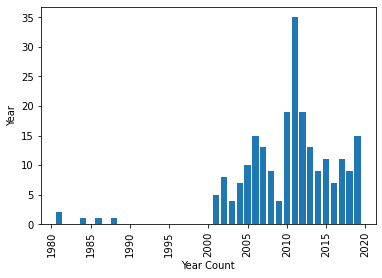

In [13]:
plt.bar(years,year_count)
plt.xticks(rotation=90)
plt.ylabel('Year')
plt.xlabel('Year Count')
plt.show()

#### From the above plot, we can see the most jornals are dated 2011 from the dataset.

In [14]:
## Relating the Author and Author IDs

In [15]:
Names=df["Authors"].str.split(",", expand=True)
# , columns=["Author1","Author2","Author3","Author4","Author5","Author6","Author7"]
Names = Names.iloc[:,:5]
column_names = {0:"Author", 1:"Author 1",2:"Author 2",
               3:"Author 3",4:"Author 4"}
authors = Names.rename(columns = column_names)
authors.shape

(228, 5)

In [16]:
ID = df["Author(s) ID"].str.split(";", expand=True)
ID = ID.iloc[:,:5]
column_names = {0:"Author ID", 1:"Author ID 1",2:"Author ID 2",
               3:"Author ID 3",4:"Author ID 4"}
ids = ID.rename(columns = column_names)
ids

,Author ID,Author ID 1,Author ID 2,Author ID 3,Author ID 4
0,57189258279,8933999000,22834655700,55841871100,55387606200
1,57212174318,57212168803,,None,None
2,57194783804,56979549200,57050382000,57197771738,
3,57211844555,56074676500,6506045608,,None
4,56539905200,56770916900,57195032630,,None
...,...,...,...,...,...
223,7401448337,6507120033,7501416829,,None
224,7003634564,7005947273,,None,None
225,7006363405,,None,None,None
226,6508380805,,None,None,None


In [17]:
df = pd.concat([ids, df], axis=1)
df = pd.concat([authors,df], axis=1)

In [18]:
df = df.drop(columns = ["Authors","Author(s) ID"], axis=1)

In [19]:
df.head(2)

,Author,Author 1,Author 2,Author 3,Author 4,Author ID,Author ID 1,Author ID 2,Author ID 3,Author ID 4,Title,Year,Source title,Volume,Issue,Page start,Page end,Cited by,DOI,Link,Affiliations,Authors with affiliations,Abstract,Author Keywords,References,Correspondence Address,Publisher,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Source,EID
0,Beni E.H.,Lagaisse B.,Joosen W.,Aly A.,Brackx M.,57189258279,8933999000,22834655700,55841871100,55387606200,Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,50,57.0,NaN,10.1145/3366626.3368132,https://www.scopus.com/inward/record.uri?eid=2...,"imec-DistriNet, KU Leuven, Belgium; imec-COSIC...","Beni, E.H., imec-DistriNet, KU Leuven, Belgium...",Business application owners want to outsource ...,Data protection; Middleware; Security and privacy,"Agrawal, R., Kiernan, J., Srikant, R., Xu, Y.,...",NaN,"Association for Computing Machinery, Inc",NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Scopus,2-s2.0-85078939286
1,Xiong H.,Zhou Y.,None,None,None,57212174318,57212168803,,None,None,Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,29,34.0,NaN,10.2112/SI97-005.1,https://www.scopus.com/inward/record.uri?eid=2...,"School of Management, Nanchang University, Nan...","Xiong, H., School of Management, Nanchang Univ...",The existing enterprise performance evaluation...,analytic hierarchy process; Environmental valu...,"Boczon, A., Dudzinska, M., Kowalska, A., Effec...","Xiong, H.; School of Management, Nanchang Univ...",Coastal Education Research Foundation Inc.,07490208,English,J. Coast. Res.,Article,Final,Scopus,2-s2.0-85076117139
